In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [11]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train shape:  (60000, 784)
60000 train samples
10000 test samples


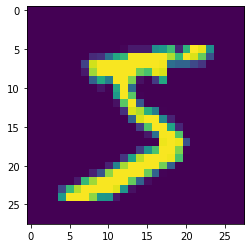

In [13]:
# make suare images have shape (28, 28, 1)
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

a_train_img = x_train[0]
a_train_img = np.reshape(a_train_img, (28, 28))
plt.imshow(a_train_img)

In [14]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [20]:
# Build the model
model = keras.Sequential(
[
      tf.keras.layers.Input(shape=(28*28,)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(30, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 200)               157000    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 60)                6060      
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                                 
 dense_18 (Dense)            (None, 30)               

In [22]:
batch_size = 128
epochs = 30

model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 3s 5ms/step - loss: 0.0453 - accuracy: 0.9885 - val_loss: 0.0775 - val_accuracy: 0.9833
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0399 - accuracy: 0.9894 - val_loss: 0.0828 - val_accuracy: 0.9823
Epoch 3/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0417 - accuracy: 0.9892 - val_loss: 0.0921 - val_accuracy: 0.9817
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0401 - accuracy: 0.9894 - val_loss: 0.0814 - val_accuracy: 0.9830
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0365 - accuracy: 0.9900 - val_loss: 0.0790 - val_accuracy: 0.9840
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0393 - accuracy: 0.9897 - val_loss: 0.0937 - val_accuracy: 0.9827
Epoch 7/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0363 - accuracy: 0.9903 - val_loss: 0.0867 - val_accuracy: 0.9842
Epoch 

In [26]:
# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.10363706201314926
Test accuracy:  0.982200026512146


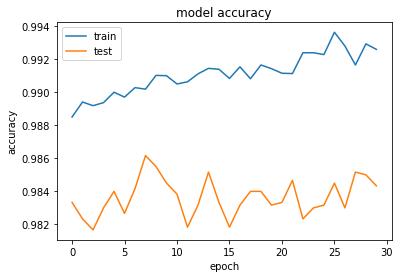

In [27]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

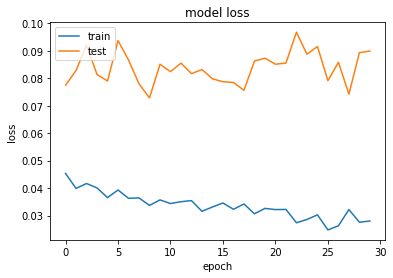

In [28]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()